In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn

In [2]:
df = pd.read_csv('E:/heights.csv')

In [3]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [4]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:xlabel='height', ylabel='Count'>

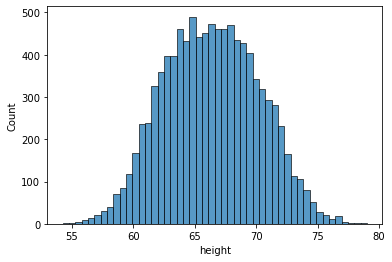

In [5]:
sn.histplot(df.height)

<AxesSubplot:xlabel='height', ylabel='Count'>

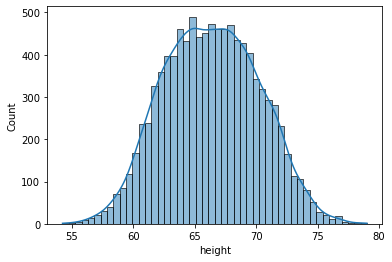

In [6]:
sn.histplot(df.height, kde= True)

In [7]:
mean = df.height.mean()
mean

66.3675597548656

In [8]:
standard_diviation = df.height.std()
standard_diviation

3.847528120795573

In [9]:
mean - 3*standard_diviation

54.824975392478876

In [10]:
mean + 3*standard_diviation

77.91014411725232

In [11]:
df_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [12]:
df_outlier.describe() # Outlier removed as seen in the count  

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


### Discover outliers with visualization tools

#### Box plot

<AxesSubplot:xlabel='height'>

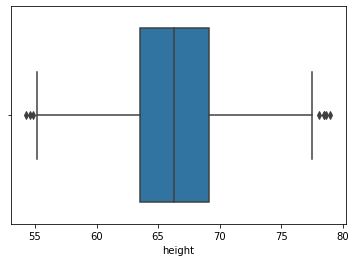

In [13]:
sn.boxplot(x=df['height']) # for the input dataframe df

<AxesSubplot:xlabel='height'>

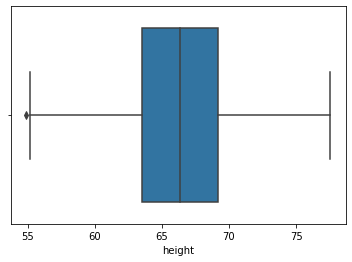

In [14]:
sn.boxplot(x=df_outlier['height']) # for the outliers removes dataframe df.outlier

##### Z score is calculate by subtracting each value with the mean of data and dividing it by standard deviation

In [15]:
df['z_score'] = (df.height - df.height.mean()) /df.height.std()
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [16]:
df.describe()

,height,z_score
count,10000.000000,1.000000e+04
mean,66.367560,1.062926e-13
std,3.847528,1.000000e+00
min,54.263133,-3.146027e+00
25%,63.505620,-7.438384e-01
50%,66.318070,-1.286272e-02
75%,69.174262,7.294819e-01
max,78.998742,3.282934e+00


In [17]:
df[df['z_score']>3]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [18]:
from scipy import stats # Z score using SciPy
a = stats.zscore(df.height) 
a

array([ 1.94406149,  0.62753668,  2.01244346, ..., -0.64968792,
        0.69312469, -1.14970831])